## Probable lifetime value estimation with time projection

CLTV = Expected Number of Transaction * Expected Average Profit

#### There are 2 models to make this estimation.

CLTV = BGNBD Model * Gamma Gamma Submodel

### Expected Number of Transaction with BGNBD (Beta Geometric Negative Binominal distribution)

Our aim here is to model the purchasing behavior of the general audience through probability distributions and to reduce them to the personalities of individuals.

This model contains some probability and some statistics. Expected means the expected value of a random variable, that is, the mean of that random variable. A random variable is a variable that takes its values from the results of an experiment.
The BGNBD Model probabilistically models two processes for the Expected Number of Transaction.
- Transaction Process (Buy) + Dropout Process (Till you die)

#### Transaction Process (Buy)
* As long as it is Alive, the number of transactions to be performed by a customer in a certain time period is distributed by the transaction rate parameter and Poison. In other words, as long as a customer is alive, he will continue to make random purchases around his own transaction rate.
* For example: Let's say Mr. John made a purchase. For example, 5 units, another time 10 units, another time 7 units, another time 8 units. John has a brain trading habit. This theory says that Mr. John continues to maintain the average buying behavior as on the average.
* Transaction rates vary according to each customer and the gamma is distributed for the entire audience. (r,a) In other words, the theory of having a different habit for each customer expresses the Gamma distribution.

#### Dropout Process (Till you die)
* Shop until you die, because one day the customer will leave, that is, they will be churn, briefly away from the brand. Each customer has a dropout rate (dropout probability).



### BG-NBD Model
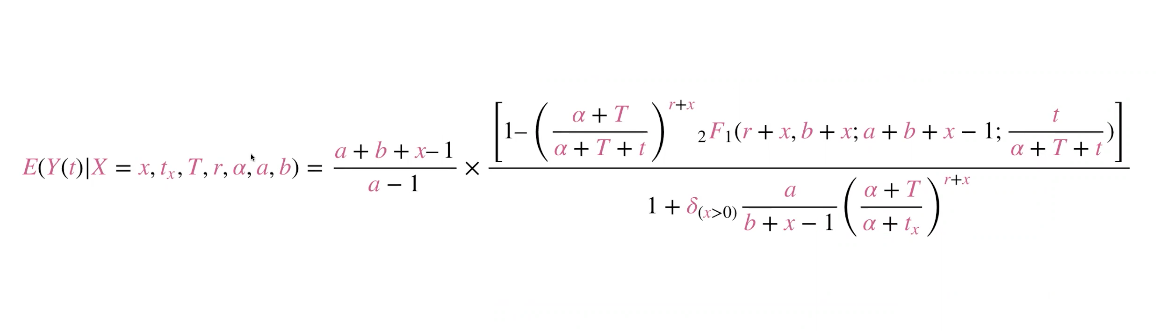

Here:
* x - is the number of repeat sales from a customer.
* tx - the time (in weekly terms) from the customer's first purchase to their last purchase. But the 'recency' value here is not 'recency' in RFM and similar methods. It is a customer-specific value, the difference between each customer's first and last purchase.
* T - is the time since the customer's first purchase, that is, the age of the customer. For example, today is the analysis day, the time between the customer's first purchase and the analysis day, and it is calculated in weekly terms.
* r and a - are the parameters of the Gamma distribution modeling the transaction rate.
* a and b - inactive probability is the parameter of Beta which models drop rate probability.

## Gamma Gamma Submodel

It is used to estimate how much profit a customer can generate on average per transaction.

* The monetary value of a customer's transactions is randomly distributed around the average of the transcation values.
For example: Mr. John made a purchase. Various products have received a transaction, and there is a certain transaction value. When he made another transaction, he left another monetary value, and in another transaction he left another monetary value. There are 3 transactions here, but there may be different volumes in the transaction value left. So for example: he left 100 in one, 300 in another, 200 in another. John made 3 transactions and left a total value of 600, the average of which is 200. John continues to leave us money around this value.

* The average transaction value may change between users over time, but not for a single user.

* The average transaction value is gamma distributed among all customers.
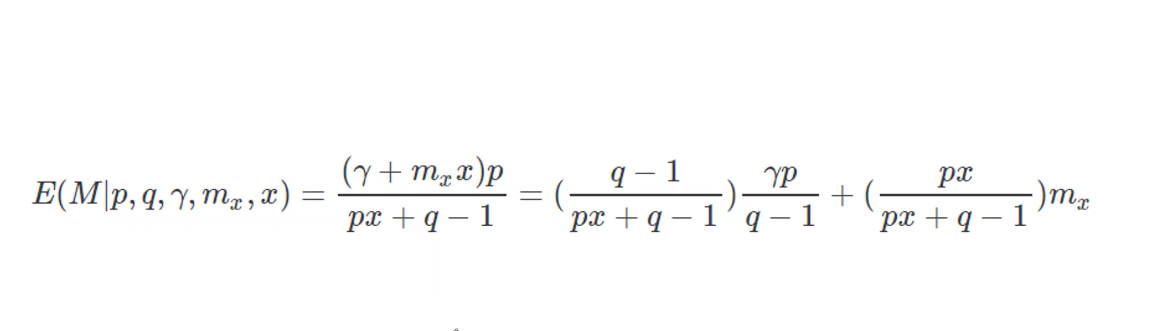

* x - is the number of repeat sales from a customer.
* mx - monetary value. It is the observed transaction value, ie total_price / total_transaction_num.
* Other values are distribution values when customers' values are entered.

# CLTV Predcition with BG-NBD & Gamma Gamma

1. Data Preparation
2. Expected Number of Transaction with BG-NBD
3. Expected Average Profit with Gamma-Gamma Model
4. Calculating with BG-NBD and Gamma-Gamma Model
5. Creating Segmentation based on the CLTV
6. Functiolization of the Whole Process

## 1. Data Preparation

### About of the data

Analysis will be made based on the data of the UK-based company that sells online souvenirs. The majority of the company's customers are wholesalers, so the company works with corporate customers.
### Variables
* InvoiceNo: Invoice number. Each transaction is given a new unique invoice name. If there is an invoice that starts with C, it shows that the transaction has been cancelled.
* StockCode: Product code.
* Description: Name of the product
* Quantity: Number of items. It shows how many of the products on the invoice have been sold.
* InvoiceDate: Invoice date and time.
* UnitPrice: Product price
* CustomerID: Unique customer number.
* Country: Country name

In [61]:
pip install lifetimes

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [62]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

In [63]:
from lifetimes import BetaGeoFitter
from lifetimes import GammaGammaFitter
from lifetimes.plotting import plot_period_transactions

In [64]:
from sklearn.preprocessing import MinMaxScaler

In [65]:
df_ = pd.read_excel('online_retail_II.xlsx', sheet_name = 'Year 2010-2011')

df = df_.copy()
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541910.0,9.552234,218.080957,-80995.00,1.00,3.00,10.00,80995.0
Price,541910.0,4.611138,96.759765,-11062.06,1.25,2.08,4.13,38970.0
Customer ID,406830.0,15287.684160,1713.603074,12346.00,13953.00,15152.00,16791.00,18287.0


,count,mean,std,min,25%,50%,75%,max
Quantity,541910.0,9.552234,218.080957,-80995.00,1.00,3.00,10.00,80995.0
Price,541910.0,4.611138,96.759765,-11062.06,1.25,2.08,4.13,38970.0
Customer ID,406830.0,15287.684160,1713.603074,12346.00,13953.00,15152.00,16791.00,18287.0


In [66]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


### Data Preprocessing

* In the data preprocessing process, we will first look at the 'null' values in our data set, as we can see, since the missing values are in the 'Customer ID' variable, it is not possible for us to replace them with any rvalues. For this reason, we will subtract these values from our data.

* Invoices starting with 'C' in the 'Invoice' variable in the dataset show canceled operations. In this case, we should also subtract these values from our data.

* We saw the changes in our data with the first 2 operations we performed within the framework of data preprocessing processes. However, some touch-ups may still be necessary. We should keep Price and Quantity values greater than 0 in our data.

In [67]:
df.isnull().sum()

Invoice             0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
Price               0
Customer ID    135080
Country             0
dtype: int64

Invoice             0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
Price               0
Customer ID    135080
Country             0
dtype: int64

In [68]:
df.dropna(inplace = True)

In [69]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,406830.0,12.061276,248.693065,-80995.0,2.00,5.00,12.00,80995.0
Price,406830.0,3.460507,69.315080,0.0,1.25,1.95,3.75,38970.0
Customer ID,406830.0,15287.684160,1713.603074,12346.0,13953.00,15152.00,16791.00,18287.0


,count,mean,std,min,25%,50%,75%,max
Quantity,406830.0,12.061276,248.693065,-80995.0,2.00,5.00,12.00,80995.0
Price,406830.0,3.460507,69.315080,0.0,1.25,1.95,3.75,38970.0
Customer ID,406830.0,15287.684160,1713.603074,12346.0,13953.00,15152.00,16791.00,18287.0


In [70]:
df = df[~df['Invoice'].str.contains('C', na = False)]
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,397925.0,13.021793,180.419984,1.0,2.00,6.00,12.00,80995.00
Price,397925.0,3.116212,22.096773,0.0,1.25,1.95,3.75,8142.75
Customer ID,397925.0,15294.308601,1713.172738,12346.0,13969.00,15159.00,16795.00,18287.00


,count,mean,std,min,25%,50%,75%,max
Quantity,397925.0,13.021793,180.419984,1.0,2.00,6.00,12.00,80995.00
Price,397925.0,3.116212,22.096773,0.0,1.25,1.95,3.75,8142.75
Customer ID,397925.0,15294.308601,1713.172738,12346.0,13969.00,15159.00,16795.00,18287.00


In [71]:
df = df[df['Quantity'] > 0]
df = df[df['Price'] > 0]
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,397885.0,12.988208,179.331551,1.000,2.00,6.00,12.00,80995.00
Price,397885.0,3.116525,22.097861,0.001,1.25,1.95,3.75,8142.75
Customer ID,397885.0,15294.416882,1713.144421,12346.000,13969.00,15159.00,16795.00,18287.00


,count,mean,std,min,25%,50%,75%,max
Quantity,397885.0,12.988208,179.331551,1.000,2.00,6.00,12.00,80995.00
Price,397885.0,3.116525,22.097861,0.001,1.25,1.95,3.75,8142.75
Customer ID,397885.0,15294.416882,1713.144421,12346.000,13969.00,15159.00,16795.00,18287.00


## Searching and replacing outliers

### Outlier_thresholds function

Since the models we will establish are probabilistic and statistical models, the distribution of the variables that will be used while establishing these models will directly affect the results. Therefore, after creating the variables we have, we need to touch the outliers in these variables. For this reason, we will detect outliers with a method called 'Box Plot' or IQR. Normally 25% and 75% are used for quartile1 and quartile3, but we used 1% and 99%, this is because of my own interpretation. If I use 25 and 75 for this data set, we may encounter a lot of data loss.

In [72]:
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.01)
    quartile3 = dataframe[variable].quantile(0.99)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

### replace with thresholds function
With this function, we will replace the outliers you have set with a certain threshold value.

In [73]:
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [74]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,397885.0,12.988208,179.331551,1.000,2.00,6.00,12.00,80995.00
Price,397885.0,3.116525,22.097861,0.001,1.25,1.95,3.75,8142.75
Customer ID,397885.0,15294.416882,1713.144421,12346.000,13969.00,15159.00,16795.00,18287.00


,count,mean,std,min,25%,50%,75%,max
Quantity,397885.0,12.988208,179.331551,1.000,2.00,6.00,12.00,80995.00
Price,397885.0,3.116525,22.097861,0.001,1.25,1.95,3.75,8142.75
Customer ID,397885.0,15294.416882,1713.144421,12346.000,13969.00,15159.00,16795.00,18287.00


### Now we will apply these two functions to our data.

The implementation of these functions is to replace the outliers in our dataset with lower and upper limits. As it can be seen, there is a change in the max value and std values of the Quantity and Price variables in our data. This indicates that the data falls into a more normal data shape.

In [75]:
outlier_thresholds(df, 'Quantity')

(-177.5, 298.5)

(-177.5, 298.5)

In [76]:
outlier_thresholds(df, 'Price')

(-21.9, 37.06)

(-21.9, 37.06)

In [77]:
replace_with_thresholds(df, 'Quantity')

In [78]:
replace_with_thresholds(df, 'Price')

In [79]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,397885.0,11.830770,25.523052,1.000,2.00,6.00,12.00,298.50
Price,397885.0,2.893492,3.227175,0.001,1.25,1.95,3.75,37.06
Customer ID,397885.0,15294.416882,1713.144421,12346.000,13969.00,15159.00,16795.00,18287.00


,count,mean,std,min,25%,50%,75%,max
Quantity,397885.0,11.830770,25.523052,1.000,2.00,6.00,12.00,298.50
Price,397885.0,2.893492,3.227175,0.001,1.25,1.95,3.75,37.06
Customer ID,397885.0,15294.416882,1713.144421,12346.000,13969.00,15159.00,16795.00,18287.00


In [80]:
df['TotalPrice'] = df['Quantity'] * df['Price']

In [81]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


### Since our dataset is a bit old, we should include the date of analysis in the program.

In [82]:
today_date = dt.datetime(2011, 12, 11)

# Preparation of Lifetime Data Structure

BG-NBD and Gamma Gamma models have a special data format that they expect from us.
Currently, we have passed the transaction data, that is, the transaction data, through some preprocessing processes within the framework of its dynamics. Now, we need to transform this data into a form that is integrated according to users, aggregated specifically for users, and responds to the functions of the lifetimes module and library.
Let's revisit some metrics.
* recency: The time elapsed since the last count was received. This is not the R value we use when doing other RFM analysis. It expresses the difference between the last purchase and the first purchase for the customer. (weekly, per user);
* T: The age of the customer, ie how long before the analysis date the first purchase was made (weekly);
* frequency: total number of repeat purchases (frequency > 1);
* monetary_value: average earnings per purchase, as it can be seen, the monetary value does not represent the total_price value in the other RFM analysis, here it expresses the average earnings per monetary purchase.

In [83]:
cltv_df = df.groupby('Customer ID').agg({'InvoiceDate': [lambda date: (date.max()-date.min()).days,
                                                        lambda date: (today_date - date.min()).days],
                                        'Invoice': lambda num: num.nunique(),
                                        'TotalPrice': lambda TotalPrice: TotalPrice.sum()})

In [84]:
cltv_df.head()

InvoiceDate             Invoice TotalPrice
             <lambda_0> <lambda_1> <lambda>   <lambda>
Customer ID                                           
12346.0               0        326        1     310.44
12347.0             365        368        7    4310.00
12348.0             282        359        4    1770.78
12349.0               0         19        1    1491.72
12350.0               0        311        1     331.46

InvoiceDate             Invoice TotalPrice
             <lambda_0> <lambda_1> <lambda>   <lambda>
Customer ID                                           
12346.0               0        326        1     310.44
12347.0             365        368        7    4310.00
12348.0             282        359        4    1770.78
12349.0               0         19        1    1491.72
12350.0               0        311        1     331.46

#### It is noticeable that the readability level of our data is not very good. First, we name the initial naming, then we give the new naming to the columns.

In [85]:
cltv_df.columns = cltv_df.columns.droplevel()
cltv_df.head()

,<lambda_0>,<lambda_1>,<lambda>,<lambda>
Customer ID,,,,
12346.0,0,326,1,310.44
12347.0,365,368,7,4310.00
12348.0,282,359,4,1770.78
12349.0,0,19,1,1491.72
12350.0,0,311,1,331.46


,<lambda_0>,<lambda_1>,<lambda>,<lambda>
Customer ID,,,,
12346.0,0,326,1,310.44
12347.0,365,368,7,4310.00
12348.0,282,359,4,1770.78
12349.0,0,19,1,1491.72
12350.0,0,311,1,331.46


In [86]:
cltv_df.columns = ['recency', 'T', 'frequency', 'monetary']

In [87]:
cltv_df.head()

,recency,T,frequency,monetary
Customer ID,,,,
12346.0,0,326,1,310.44
12347.0,365,368,7,4310.00
12348.0,282,359,4,1770.78
12349.0,0,19,1,1491.72
12350.0,0,311,1,331.46


,recency,T,frequency,monetary
Customer ID,,,,
12346.0,0,326,1,310.44
12347.0,365,368,7,4310.00
12348.0,282,359,4,1770.78
12349.0,0,19,1,1491.72
12350.0,0,311,1,331.46


#### Now we see that the variables of our data are suitable for our models, but we have a few last steps left. Converting the days data to weekly, averaging the monetary value and keeping the frequency value greater than 1.

In [88]:
cltv_df['monetary'] = cltv_df['monetary'] / cltv_df['frequency']

In [89]:
cltv_df.head()

,recency,T,frequency,monetary
Customer ID,,,,
12346.0,0,326,1,310.440000
12347.0,365,368,7,615.714286
12348.0,282,359,4,442.695000
12349.0,0,19,1,1491.720000
12350.0,0,311,1,331.460000


,recency,T,frequency,monetary
Customer ID,,,,
12346.0,0,326,1,310.440000
12347.0,365,368,7,615.714286
12348.0,282,359,4,442.695000
12349.0,0,19,1,1491.720000
12350.0,0,311,1,331.460000


In [90]:
cltv_df.describe().T

,count,mean,std,min,25%,50%,75%,max
recency,4338.0,130.448594,132.039554,0.00,0.00000,92.500000,251.750000,373.00
T,4338.0,223.831028,117.854570,1.00,113.00000,249.000000,327.000000,374.00
frequency,4338.0,4.272015,7.697998,1.00,1.00000,2.000000,5.000000,209.00
monetary,4338.0,364.118466,367.258216,3.45,176.85125,288.225455,422.029375,6207.67


,count,mean,std,min,25%,50%,75%,max
recency,4338.0,130.448594,132.039554,0.00,0.00000,92.500000,251.750000,373.00
T,4338.0,223.831028,117.854570,1.00,113.00000,249.000000,327.000000,374.00
frequency,4338.0,4.272015,7.697998,1.00,1.00000,2.000000,5.000000,209.00
monetary,4338.0,364.118466,367.258216,3.45,176.85125,288.225455,422.029375,6207.67


In [91]:
cltv_df = cltv_df[(cltv_df['frequency'] > 1)]

In [92]:
cltv_df.head()

,recency,T,frequency,monetary
Customer ID,,,,
12347.0,365,368,7,615.714286
12348.0,282,359,4,442.695000
12352.0,260,297,8,219.542500
12356.0,302,326,3,937.143333
12358.0,149,151,2,575.210000


,recency,T,frequency,monetary
Customer ID,,,,
12347.0,365,368,7,615.714286
12348.0,282,359,4,442.695000
12352.0,260,297,8,219.542500
12356.0,302,326,3,937.143333
12358.0,149,151,2,575.210000


In [93]:
cltv_df.describe().T

,count,mean,std,min,25%,50%,75%,max
recency,2845.0,198.905448,113.866961,0.00,98.000000,207.000000,299.00,373.000000
T,2845.0,258.784183,102.990922,3.00,192.000000,283.000000,359.00,374.000000
frequency,2845.0,5.989104,9.044247,2.00,2.000000,4.000000,6.00,209.000000
monetary,2845.0,372.173563,349.301186,3.45,191.073333,300.487308,436.87,5724.302619


,count,mean,std,min,25%,50%,75%,max
recency,2845.0,198.905448,113.866961,0.00,98.000000,207.000000,299.00,373.000000
T,2845.0,258.784183,102.990922,3.00,192.000000,283.000000,359.00,374.000000
frequency,2845.0,5.989104,9.044247,2.00,2.000000,4.000000,6.00,209.000000
monetary,2845.0,372.173563,349.301186,3.45,191.073333,300.487308,436.87,5724.302619


In [94]:
cltv_df['recency'] = cltv_df['recency'] / 7
cltv_df['T'] = cltv_df['T'] / 7

#### We performed all the operations, we converted the 'recency' and 'T' variables to weekly terms, and finally we converted the 'monetary' value to the average form.

In [95]:
cltv_df.head()

,recency,T,frequency,monetary
Customer ID,,,,
12347.0,52.142857,52.571429,7,615.714286
12348.0,40.285714,51.285714,4,442.695000
12352.0,37.142857,42.428571,8,219.542500
12356.0,43.142857,46.571429,3,937.143333
12358.0,21.285714,21.571429,2,575.210000


,recency,T,frequency,monetary
Customer ID,,,,
12347.0,52.142857,52.571429,7,615.714286
12348.0,40.285714,51.285714,4,442.695000
12352.0,37.142857,42.428571,8,219.542500
12356.0,43.142857,46.571429,3,937.143333
12358.0,21.285714,21.571429,2,575.210000


In [96]:
cltv_df.describe().T

,count,mean,std,min,25%,50%,75%,max
recency,2845.0,28.415064,16.266709,0.000000,14.000000,29.571429,42.714286,53.285714
T,2845.0,36.969169,14.712989,0.428571,27.428571,40.428571,51.285714,53.428571
frequency,2845.0,5.989104,9.044247,2.000000,2.000000,4.000000,6.000000,209.000000
monetary,2845.0,372.173563,349.301186,3.450000,191.073333,300.487308,436.870000,5724.302619


,count,mean,std,min,25%,50%,75%,max
recency,2845.0,28.415064,16.266709,0.000000,14.000000,29.571429,42.714286,53.285714
T,2845.0,36.969169,14.712989,0.428571,27.428571,40.428571,51.285714,53.428571
frequency,2845.0,5.989104,9.044247,2.000000,2.000000,4.000000,6.000000,209.000000
monetary,2845.0,372.173563,349.301186,3.450000,191.073333,300.487308,436.870000,5724.302619


# Establishment of BG-NBD Model

When we 'fit' the BetaGeoFitter model, it asks us for the variables of our dataset.

In [97]:
bgf = BetaGeoFitter(penalizer_coef = 0.001)

In [98]:
bgf.fit(cltv_df['frequency'],
       cltv_df['recency'],
       cltv_df['T'])

<lifetimes.BetaGeoFitter: fitted with 2845 subjects, a: 0.12, alpha: 11.41, b: 2.49, r: 2.18>

<lifetimes.BetaGeoFitter: fitted with 2845 subjects, a: 0.12, alpha: 11.41, b: 2.49, r: 2.18>

## Task 1

* Who are the 10 customers we expect to purchase the most in a week?

In [99]:
bgf.conditional_expected_number_of_purchases_up_to_time(1,
                                                       cltv_df['frequency'],
                                                        cltv_df['recency'],
                                                        cltv_df['T']).sort_values(ascending = False).head(10)

Customer ID
12748.0    3.249532
14911.0    3.126418
17841.0    1.940152
13089.0    1.537420
14606.0    1.463897
15311.0    1.433618
12971.0    1.356931
14646.0    1.206361
13408.0    0.986184
18102.0    0.968542
dtype: float64

Customer ID
12748.0    3.249532
14911.0    3.126418
17841.0    1.940152
13089.0    1.537420
14606.0    1.463897
15311.0    1.433618
12971.0    1.356931
14646.0    1.206361
13408.0    0.986184
18102.0    0.968542
dtype: float64

#### We add the values from our Predict model to our 'cltv_df' dataset.

In [100]:
cltv_df['expected_purc_1_week'] = bgf.conditional_expected_number_of_purchases_up_to_time(1,
                                                       cltv_df['frequency'],
                                                        cltv_df['recency'],
                                                        cltv_df['T'])

In [101]:
cltv_df.head()

,recency,T,frequency,monetary,expected_purc_1_week
Customer ID,,,,,
12347.0,52.142857,52.571429,7,615.714286,0.141281
12348.0,40.285714,51.285714,4,442.695000,0.091965
12352.0,37.142857,42.428571,8,219.542500,0.182390
12356.0,43.142857,46.571429,3,937.143333,0.086162
12358.0,21.285714,21.571429,2,575.210000,0.122256


,recency,T,frequency,monetary,expected_purc_1_week
Customer ID,,,,,
12347.0,52.142857,52.571429,7,615.714286,0.141281
12348.0,40.285714,51.285714,4,442.695000,0.091965
12352.0,37.142857,42.428571,8,219.542500,0.182390
12356.0,43.142857,46.571429,3,937.143333,0.086162
12358.0,21.285714,21.571429,2,575.210000,0.122256


## Task 2

* Who are the 10 customers we expect to purchase the most in a month?

In [102]:
bgf.conditional_expected_number_of_purchases_up_to_time(4,
                                                       cltv_df['frequency'],
                                                        cltv_df['recency'],
                                                        cltv_df['T']).sort_values(ascending = False).head(10)

Customer ID
12748.0    12.963340
14911.0    12.472198
17841.0     7.739802
13089.0     6.133030
14606.0     5.839867
15311.0     5.719073
12971.0     5.413112
14646.0     4.811915
13408.0     3.934114
18102.0     3.863599
dtype: float64

Customer ID
12748.0    12.963340
14911.0    12.472198
17841.0     7.739802
13089.0     6.133030
14606.0     5.839867
15311.0     5.719073
12971.0     5.413112
14646.0     4.811915
13408.0     3.934114
18102.0     3.863599
dtype: float64

## Task 3

What will be the estimated value of the company's total sales amount in 1 month?

In [103]:
bgf.conditional_expected_number_of_purchases_up_to_time(4,
                                                       cltv_df['frequency'],
                                                        cltv_df['recency'],
                                                        cltv_df['T']).sum()

1776.893473220294

1776.893473220294

## Evaluation of prediction results

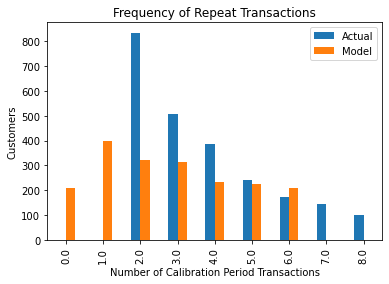

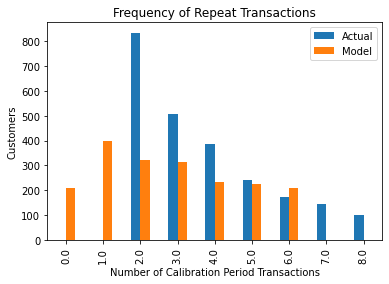

In [104]:
plot_period_transactions(bgf)
plt.show()

# Establishing Gamma Gamma Model

In the establishment of this model, it takes its own variables like the BG-NBD model and creates a model specific to these variables.

In [105]:
ggf = GammaGammaFitter(penalizer_coef = 0.01)

In [106]:
ggf.fit(cltv_df['frequency'], cltv_df['monetary'])

<lifetimes.GammaGammaFitter: fitted with 2845 subjects, p: 3.79, q: 0.34, v: 3.73>

<lifetimes.GammaGammaFitter: fitted with 2845 subjects, p: 3.79, q: 0.34, v: 3.73>

In [107]:
ggf.conditional_expected_average_profit(cltv_df['frequency'],
                                  cltv_df['monetary']).sort_values(ascending = False).head(10)

Customer ID
12415.0    5772.178171
12590.0    5029.419619
12435.0    4288.944021
12409.0    3918.812814
14088.0    3917.129721
18102.0    3870.996931
12753.0    3678.578346
14646.0    3654.814813
15749.0    3216.052342
14096.0    3196.436057
dtype: float64

Customer ID
12415.0    5772.178171
12590.0    5029.419619
12435.0    4288.944021
12409.0    3918.812814
14088.0    3917.129721
18102.0    3870.996931
12753.0    3678.578346
14646.0    3654.814813
15749.0    3216.052342
14096.0    3196.436057
dtype: float64

#### Let's send the results we obtained with this model to the 'clv df' dataset.

In [108]:
cltv_df['expected_average_profit'] = ggf.conditional_expected_average_profit(cltv_df['frequency'],
                                  cltv_df['monetary'])

In [109]:
cltv_df.head()

,recency,T,frequency,monetary,expected_purc_1_week,expected_average_profit
Customer ID,,,,,,
12347.0,52.142857,52.571429,7,615.714286,0.141281,631.912299
12348.0,40.285714,51.285714,4,442.695000,0.091965,463.745963
12352.0,37.142857,42.428571,8,219.542500,0.182390,224.886768
12356.0,43.142857,46.571429,3,937.143333,0.086162,995.998921
12358.0,21.285714,21.571429,2,575.210000,0.122256,631.902166


,recency,T,frequency,monetary,expected_purc_1_week,expected_average_profit
Customer ID,,,,,,
12347.0,52.142857,52.571429,7,615.714286,0.141281,631.912299
12348.0,40.285714,51.285714,4,442.695000,0.091965,463.745963
12352.0,37.142857,42.428571,8,219.542500,0.182390,224.886768
12356.0,43.142857,46.571429,3,937.143333,0.086162,995.998921
12358.0,21.285714,21.571429,2,575.210000,0.122256,631.902166


#### To sort our dataset in descending order.

In [110]:
cltv_df.sort_values('expected_average_profit', ascending = False).head(10)

,recency,T,frequency,monetary,expected_purc_1_week,expected_average_profit
Customer ID,,,,,,
12415.0,44.714286,48.285714,21,5724.302619,0.379598,5772.178171
12590.0,0.000000,30.285714,2,4591.172500,0.011543,5029.419619
12435.0,26.857143,38.285714,2,3914.945000,0.076317,4288.944021
12409.0,14.714286,26.142857,3,3690.890000,0.117435,3918.812814
14088.0,44.571429,46.142857,13,3864.554615,0.260285,3917.129721
18102.0,52.285714,52.571429,60,3859.739083,0.968542,3870.996931
12753.0,48.428571,51.857143,6,3571.565000,0.126057,3678.578346
14646.0,50.428571,50.714286,73,3646.075685,1.206361,3654.814813
15749.0,13.857143,47.571429,3,3028.780000,0.027983,3216.052342


,recency,T,frequency,monetary,expected_purc_1_week,expected_average_profit
Customer ID,,,,,,
12415.0,44.714286,48.285714,21,5724.302619,0.379598,5772.178171
12590.0,0.000000,30.285714,2,4591.172500,0.011543,5029.419619
12435.0,26.857143,38.285714,2,3914.945000,0.076317,4288.944021
12409.0,14.714286,26.142857,3,3690.890000,0.117435,3918.812814
14088.0,44.571429,46.142857,13,3864.554615,0.260285,3917.129721
18102.0,52.285714,52.571429,60,3859.739083,0.968542,3870.996931
12753.0,48.428571,51.857143,6,3571.565000,0.126057,3678.578346
14646.0,50.428571,50.714286,73,3646.075685,1.206361,3654.814813
15749.0,13.857143,47.571429,3,3028.780000,0.027983,3216.052342


# Calculating CLTV using BG-NBD and Gamma Gamma Model

Here the 'customer_lifetime_value method says, 'Give me the Gamma Gamma Model and BG-NBD model', as well as show the frequency, recency, T and monetary values. In some cases, we can offer discounts on our products, but we cannot ignore this discount = 0.01. When we run this code, customer_lifetime_value will be calculated for each observation.

In [111]:
cltv = ggf.customer_lifetime_value(bgf,
                                  cltv_df['frequency'],
                                  cltv_df['recency'],
                                  cltv_df['T'],
                                  cltv_df['monetary'],
                                  time = 3, # 3 aylik
                                  freq = 'W', # T-nin frekans bilgisi
                                  discount_rate = 0.01)

In [112]:
cltv

Customer ID
12347.0    1128.447657
12348.0     538.808948
12352.0     517.500018
12356.0    1083.090254
12358.0     966.672697
              ...     
18272.0    1146.205652
18273.0      96.564818
18282.0     168.594597
18283.0     505.511694
18287.0     988.302852
Name: clv, Length: 2845, dtype: float64

Customer ID
12347.0    1128.447657
12348.0     538.808948
12352.0     517.500018
12356.0    1083.090254
12358.0     966.672697
              ...     
18272.0    1146.205652
18273.0      96.564818
18282.0     168.594597
18283.0     505.511694
18287.0     988.302852
Name: clv, Length: 2845, dtype: float64

#### Converted to Customer ID index in our data, we are correcting this.

In [113]:
cltv = cltv.reset_index()
cltv.head()

,Customer ID,clv
0,12347.0,1128.447657
1,12348.0,538.808948
2,12352.0,517.500018
3,12356.0,1083.090254
4,12358.0,966.672697


,Customer ID,clv
0,12347.0,1128.447657
1,12348.0,538.808948
2,12352.0,517.500018
3,12356.0,1083.090254
4,12358.0,966.672697


#### Converted to Customer ID index in our data, we are correcting this.

In [114]:
cltv_final = cltv_df.merge(cltv, on = 'Customer ID', how = 'left')

In [115]:
cltv_final.head()

,Customer ID,recency,T,frequency,monetary,expected_purc_1_week,expected_average_profit,clv
0,12347.0,52.142857,52.571429,7,615.714286,0.141281,631.912299,1128.447657
1,12348.0,40.285714,51.285714,4,442.695000,0.091965,463.745963,538.808948
2,12352.0,37.142857,42.428571,8,219.542500,0.182390,224.886768,517.500018
3,12356.0,43.142857,46.571429,3,937.143333,0.086162,995.998921,1083.090254
4,12358.0,21.285714,21.571429,2,575.210000,0.122256,631.902166,966.672697


,Customer ID,recency,T,frequency,monetary,expected_purc_1_week,expected_average_profit,clv
0,12347.0,52.142857,52.571429,7,615.714286,0.141281,631.912299,1128.447657
1,12348.0,40.285714,51.285714,4,442.695000,0.091965,463.745963,538.808948
2,12352.0,37.142857,42.428571,8,219.542500,0.182390,224.886768,517.500018
3,12356.0,43.142857,46.571429,3,937.143333,0.086162,995.998921,1083.090254
4,12358.0,21.285714,21.571429,2,575.210000,0.122256,631.902166,966.672697


#### I currently have CLV values for the 3 month period.

In [116]:
cltv_final.sort_values(by = 'clv', ascending = False).head(10)

,Customer ID,recency,T,frequency,monetary,expected_purc_1_week,expected_average_profit,clv
1122,14646.0,50.428571,50.714286,73,3646.075685,1.206361,3654.814813,55741.084472
2761,18102.0,52.285714,52.571429,60,3859.739083,0.968542,3870.996931,47412.580115
843,14096.0,13.857143,14.571429,17,3163.588235,0.728683,3196.436057,29061.661390
36,12415.0,44.714286,48.285714,21,5724.302619,0.379598,5772.178171,27685.100011
1257,14911.0,53.142857,53.428571,201,691.710100,3.126418,692.326367,27377.411521
2458,17450.0,51.285714,52.571429,46,2863.274891,0.747427,2874.198684,27166.064343
874,14156.0,51.571429,53.142857,55,2104.026727,0.877495,2110.754226,23424.403180
2487,17511.0,52.857143,53.428571,31,2933.943065,0.508821,2950.580133,18986.612337
2075,16684.0,50.428571,51.285714,28,2209.969107,0.478052,2223.884974,13440.413085
650,13694.0,52.714286,53.428571,50,1275.700500,0.800803,1280.218258,12966.134702


,Customer ID,recency,T,frequency,monetary,expected_purc_1_week,expected_average_profit,clv
1122,14646.0,50.428571,50.714286,73,3646.075685,1.206361,3654.814813,55741.084472
2761,18102.0,52.285714,52.571429,60,3859.739083,0.968542,3870.996931,47412.580115
843,14096.0,13.857143,14.571429,17,3163.588235,0.728683,3196.436057,29061.661390
36,12415.0,44.714286,48.285714,21,5724.302619,0.379598,5772.178171,27685.100011
1257,14911.0,53.142857,53.428571,201,691.710100,3.126418,692.326367,27377.411521
2458,17450.0,51.285714,52.571429,46,2863.274891,0.747427,2874.198684,27166.064343
874,14156.0,51.571429,53.142857,55,2104.026727,0.877495,2110.754226,23424.403180
2487,17511.0,52.857143,53.428571,31,2933.943065,0.508821,2950.580133,18986.612337
2075,16684.0,50.428571,51.285714,28,2209.969107,0.478052,2223.884974,13440.413085
650,13694.0,52.714286,53.428571,50,1275.700500,0.800803,1280.218258,12966.134702


#### We have CLV values for a period of 3 months, let's add the 3-month purchase value to this.

In [117]:
cltv_df['expected_purc_3_month'] = bgf.conditional_expected_number_of_purchases_up_to_time(4 * 3,
                                                       cltv_df['frequency'],
                                                        cltv_df['recency'],
                                                        cltv_df['T'])

In [118]:
cltv_final = cltv_df.merge(cltv, on = 'Customer ID', how = 'left')

In [119]:
cltv_final.sort_values(by = 'clv', ascending = False).head(10)

,Customer ID,recency,T,frequency,monetary,expected_purc_1_week,expected_average_profit,expected_purc_3_month,clv
1122,14646.0,50.428571,50.714286,73,3646.075685,1.206361,3654.814813,14.333985,55741.084472
2761,18102.0,52.285714,52.571429,60,3859.739083,0.968542,3870.996931,11.511157,47412.580115
843,14096.0,13.857143,14.571429,17,3163.588235,0.728683,3196.436057,8.552649,29061.661390
36,12415.0,44.714286,48.285714,21,5724.302619,0.379598,5772.178171,4.507975,27685.100011
1257,14911.0,53.142857,53.428571,201,691.710100,3.126418,692.326367,37.164109,27377.411521
2458,17450.0,51.285714,52.571429,46,2863.274891,0.747427,2874.198684,8.882986,27166.064343
874,14156.0,51.571429,53.142857,55,2104.026727,0.877495,2110.754226,10.429815,23424.403180
2487,17511.0,52.857143,53.428571,31,2933.943065,0.508821,2950.580133,6.047649,18986.612337
2075,16684.0,50.428571,51.285714,28,2209.969107,0.478052,2223.884974,5.680124,13440.413085
650,13694.0,52.714286,53.428571,50,1275.700500,0.800803,1280.218258,9.518559,12966.134702


,Customer ID,recency,T,frequency,monetary,expected_purc_1_week,expected_average_profit,expected_purc_3_month,clv
1122,14646.0,50.428571,50.714286,73,3646.075685,1.206361,3654.814813,14.333985,55741.084472
2761,18102.0,52.285714,52.571429,60,3859.739083,0.968542,3870.996931,11.511157,47412.580115
843,14096.0,13.857143,14.571429,17,3163.588235,0.728683,3196.436057,8.552649,29061.661390
36,12415.0,44.714286,48.285714,21,5724.302619,0.379598,5772.178171,4.507975,27685.100011
1257,14911.0,53.142857,53.428571,201,691.710100,3.126418,692.326367,37.164109,27377.411521
2458,17450.0,51.285714,52.571429,46,2863.274891,0.747427,2874.198684,8.882986,27166.064343
874,14156.0,51.571429,53.142857,55,2104.026727,0.877495,2110.754226,10.429815,23424.403180
2487,17511.0,52.857143,53.428571,31,2933.943065,0.508821,2950.580133,6.047649,18986.612337
2075,16684.0,50.428571,51.285714,28,2209.969107,0.478052,2223.884974,5.680124,13440.413085
650,13694.0,52.714286,53.428571,50,1275.700500,0.800803,1280.218258,9.518559,12966.134702


In [120]:
cltv_final.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer ID,2845.0,15292.165554,1718.649301,1.234700e+04,13817.000000,15265.000000,16792.000000,18287.000000
recency,2845.0,28.415064,16.266709,0.000000e+00,14.000000,29.571429,42.714286,53.285714
T,2845.0,36.969169,14.712989,4.285714e-01,27.428571,40.428571,51.285714,53.428571
frequency,2845.0,5.989104,9.044247,2.000000e+00,2.000000,4.000000,6.000000,209.000000
monetary,2845.0,372.173563,349.301186,3.450000e+00,191.073333,300.487308,436.870000,5724.302619
expected_purc_1_week,2845.0,0.156881,0.148622,1.300937e-25,0.084354,0.127905,0.189987,3.249532
expected_average_profit,2845.0,392.236583,363.732459,5.819482e+00,203.926700,316.539404,459.635257,5772.178171
expected_purc_3_month,2845.0,1.852764,1.760713,1.546264e-24,0.999187,1.511503,2.244998,38.627620
clv,2845.0,858.427001,2058.202300,2.624021e-22,265.113788,508.308103,922.550058,55741.084472


,count,mean,std,min,25%,50%,75%,max
Customer ID,2845.0,15292.165554,1718.649301,1.234700e+04,13817.000000,15265.000000,16792.000000,18287.000000
recency,2845.0,28.415064,16.266709,0.000000e+00,14.000000,29.571429,42.714286,53.285714
T,2845.0,36.969169,14.712989,4.285714e-01,27.428571,40.428571,51.285714,53.428571
frequency,2845.0,5.989104,9.044247,2.000000e+00,2.000000,4.000000,6.000000,209.000000
monetary,2845.0,372.173563,349.301186,3.450000e+00,191.073333,300.487308,436.870000,5724.302619
expected_purc_1_week,2845.0,0.156881,0.148622,1.300937e-25,0.084354,0.127905,0.189987,3.249532
expected_average_profit,2845.0,392.236583,363.732459,5.819482e+00,203.926700,316.539404,459.635257,5772.178171
expected_purc_3_month,2845.0,1.852764,1.760713,1.546264e-24,0.999187,1.511503,2.244998,38.627620
clv,2845.0,858.427001,2058.202300,2.624021e-22,265.113788,508.308103,922.550058,55741.084472


## The result of the analysis.

There are points that we need to evaluate, and these customers have been given high value points, although they have high 'recency' values within themselves. The important point we consider here is that, unlike the RFM analysis, the customer returns a recency value on his own, and we can come to this conclusion, for example, the customer made a purchase and completed his own need, and in this case, the customer will decide to become a partial churn. In other words, he has completed his need and a certain period of time must pass for his next need. Here, an increase in the recency value may now create a new need for the customer, and this increases the likelihood that the customer will become a potential buyer in the near future.

# Creating the Customer Segment

Now we have done our analysis and obtained the potential purchase-value of our customers, the material value they will add as probable values.
Now we have to do a segmentation so that we can deal with our customers.

In [125]:
cltv_final['segment'] = pd.qcut(cltv_final['clv'], 4, labels = ['D', 'C', 'B', 'A'])

In [126]:
cltv_final.groupby('segment').agg(
{'count', 'mean', 'sum'})

Customer ID                      recency                      \
                 mean         sum count       mean           sum count   
segment                                                                  
D        15558.476124  11077635.0   712  22.073836  15716.571429   712   
C        15309.634318  10885150.0   711  30.669681  21806.142857   711   
B        15352.818565  10915854.0   711  29.514768  20985.000000   711   
A        14947.358650  10627572.0   711  31.410890  22333.142857   711   

                 T                      frequency  ... expected_purc_1_week  \
              mean           sum count       mean  ...                count   
segment                                            ...                        
D        40.464888  28811.000000   712   3.064607  ...                  712   
C        38.111111  27097.000000   711   4.095640  ...                  711   
B        34.811734  24751.142857   711   5.441632  ...                  711   
A        34.484027  24518.142857   711  11.358650  ...                  711   

        expected_average_profit                      expected_purc_3_month  \
                           mean            sum count                  mean   
segment                                                                      
D                    199.437732  141999.665009   712              0.840015   
C                    289.985578  206179.746147   711              1.425060   
B                    393.894435  280058.943138   711              1.916539   
A                    685.899752  487674.723941   711              3.230865   

                                    clv                      
                 sum count         mean           sum count  
segment                                                      
D         598.090534   712   143.297037  1.020275e+05   712  
C        1013.217643   711   380.791852  2.707430e+05   711  
B        1362.659467   711   688.264968  4.893564e+05   711  
A        2297.144790   711  2222.359956  1.580098e+06   711  

[4 rows x 27 columns]

Customer ID                      recency                      \
                 mean         sum count       mean           sum count   
segment                                                                  
D        15558.476124  11077635.0   712  22.073836  15716.571429   712   
C        15309.634318  10885150.0   711  30.669681  21806.142857   711   
B        15352.818565  10915854.0   711  29.514768  20985.000000   711   
A        14947.358650  10627572.0   711  31.410890  22333.142857   711   

                 T                      frequency  ... expected_purc_1_week  \
              mean           sum count       mean  ...                count   
segment                                            ...                        
D        40.464888  28811.000000   712   3.064607  ...                  712   
C        38.111111  27097.000000   711   4.095640  ...                  711   
B        34.811734  24751.142857   711   5.441632  ...                  711   
A        34.484027  24518.142857   711  11.358650  ...                  711   

        expected_average_profit                      expected_purc_3_month  \
                           mean            sum count                  mean   
segment                                                                      
D                    199.437732  141999.665009   712              0.840015   
C                    289.985578  206179.746147   711              1.425060   
B                    393.894435  280058.943138   711              1.916539   
A                    685.899752  487674.723941   711              3.230865   

                                    clv                      
                 sum count         mean           sum count  
segment                                                      
D         598.090534   712   143.297037  1.020275e+05   712  
C        1013.217643   711   380.791852  2.707430e+05   711  
B        1362.659467   711   688.264968  4.893564e+05   711  
A        2297.144790   711  2222.359956  1.580098e+06   711  

[4 rows x 27 columns]

# Functionalization of Process

In [127]:
def create_cltv_p(dataframe, month=3):
    # 1. Veri Ön İşleme
    dataframe.dropna(inplace=True)
    dataframe = dataframe[~dataframe["Invoice"].str.contains("C", na=False)]
    dataframe = dataframe[dataframe["Quantity"] > 0]
    dataframe = dataframe[dataframe["Price"] > 0]
    replace_with_thresholds(dataframe, "Quantity")
    replace_with_thresholds(dataframe, "Price")
    dataframe["TotalPrice"] = dataframe["Quantity"] * dataframe["Price"]
    today_date = dt.datetime(2011, 12, 11)

    cltv_df = dataframe.groupby('Customer ID').agg(
        {'InvoiceDate': [lambda InvoiceDate: (InvoiceDate.max() - InvoiceDate.min()).days,
                         lambda InvoiceDate: (today_date - InvoiceDate.min()).days],
         'Invoice': lambda Invoice: Invoice.nunique(),
         'TotalPrice': lambda TotalPrice: TotalPrice.sum()})

    cltv_df.columns = cltv_df.columns.droplevel(0)
    cltv_df.columns = ['recency', 'T', 'frequency', 'monetary']
    cltv_df["monetary"] = cltv_df["monetary"] / cltv_df["frequency"]
    cltv_df = cltv_df[(cltv_df['frequency'] > 1)]
    cltv_df["recency"] = cltv_df["recency"] / 7
    cltv_df["T"] = cltv_df["T"] / 7

    # 2. BG-NBD Modelinin Kurulması
    bgf = BetaGeoFitter(penalizer_coef=0.001)
    bgf.fit(cltv_df['frequency'],
            cltv_df['recency'],
            cltv_df['T'])

    cltv_df["expected_purc_1_week"] = bgf.predict(1,
                                                  cltv_df['frequency'],
                                                  cltv_df['recency'],
                                                  cltv_df['T'])

    cltv_df["expected_purc_1_month"] = bgf.predict(4,
                                                   cltv_df['frequency'],
                                                   cltv_df['recency'],
                                                   cltv_df['T'])

    cltv_df["expected_purc_3_month"] = bgf.predict(12,
                                                   cltv_df['frequency'],
                                                   cltv_df['recency'],
                                                   cltv_df['T'])

    # 3. GAMMA-GAMMA Modelinin Kurulması
    ggf = GammaGammaFitter(penalizer_coef=0.01)
    ggf.fit(cltv_df['frequency'], cltv_df['monetary'])
    cltv_df["expected_average_profit"] = ggf.conditional_expected_average_profit(cltv_df['frequency'],
                                                                                 cltv_df['monetary'])

    # 4. BG-NBD ve GG modeli ile CLTV'nin hesaplanması.
    cltv = ggf.customer_lifetime_value(bgf,
                                       cltv_df['frequency'],
                                       cltv_df['recency'],
                                       cltv_df['T'],
                                       cltv_df['monetary'],
                                       time=month,  # 3 aylık
                                       freq="W",  # T'nin frekans bilgisi.
                                       discount_rate=0.01)

    cltv = cltv.reset_index()
    cltv_final = cltv_df.merge(cltv, on="Customer ID", how="left")
    cltv_final["segment"] = pd.qcut(cltv_final["clv"], 4, labels=["D", "C", "B", "A"])

    return cltv_final


df = df_.copy()

cltv_final2 = create_cltv_p(df)

cltv_final2.to_csv("cltv_prediction.csv")

In [128]:
cltv_final2

,Customer ID,recency,T,frequency,monetary,expected_purc_1_week,expected_purc_1_month,expected_purc_3_month,expected_average_profit,clv,segment
0,12347.0,52.142857,52.571429,7,615.714286,0.141281,0.563508,1.678373,631.912299,1128.447657,A
1,12348.0,40.285714,51.285714,4,442.695000,0.091965,0.366759,1.092027,463.745963,538.808948,B
2,12352.0,37.142857,42.428571,8,219.542500,0.182390,0.727104,2.163054,224.886768,517.500018,B
3,12356.0,43.142857,46.571429,3,937.143333,0.086162,0.343520,1.022155,995.998921,1083.090254,A
4,12358.0,21.285714,21.571429,2,575.210000,0.122256,0.486227,1.438787,631.902166,966.672697,A
...,...,...,...,...,...,...,...,...,...,...,...
2840,18272.0,34.857143,35.285714,6,513.096667,0.172062,0.685560,2.036910,529.018453,1146.205652,A
2841,18273.0,36.428571,36.857143,3,68.000000,0.104342,0.415740,1.235225,73.494233,96.564818,D
2842,18282.0,16.857143,18.142857,2,89.025000,0.135664,0.539214,1.593449,99.524928,168.594597,D
2843,18283.0,47.571429,48.285714,16,130.930000,0.301738,1.203356,3.583116,132.601228,505.511694,C


,Customer ID,recency,T,frequency,monetary,expected_purc_1_week,expected_purc_1_month,expected_purc_3_month,expected_average_profit,clv,segment
0,12347.0,52.142857,52.571429,7,615.714286,0.141281,0.563508,1.678373,631.912299,1128.447657,A
1,12348.0,40.285714,51.285714,4,442.695000,0.091965,0.366759,1.092027,463.745963,538.808948,B
2,12352.0,37.142857,42.428571,8,219.542500,0.182390,0.727104,2.163054,224.886768,517.500018,B
3,12356.0,43.142857,46.571429,3,937.143333,0.086162,0.343520,1.022155,995.998921,1083.090254,A
4,12358.0,21.285714,21.571429,2,575.210000,0.122256,0.486227,1.438787,631.902166,966.672697,A
...,...,...,...,...,...,...,...,...,...,...,...
2840,18272.0,34.857143,35.285714,6,513.096667,0.172062,0.685560,2.036910,529.018453,1146.205652,A
2841,18273.0,36.428571,36.857143,3,68.000000,0.104342,0.415740,1.235225,73.494233,96.564818,D
2842,18282.0,16.857143,18.142857,2,89.025000,0.135664,0.539214,1.593449,99.524928,168.594597,D
2843,18283.0,47.571429,48.285714,16,130.930000,0.301738,1.203356,3.583116,132.601228,505.511694,C
